#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

from kydavra import PearsonCorrelationSelector, PointBiserialCorrSelector

import warnings

# Suppress Matplotlib warnings
warnings.filterwarnings('ignore', category=UserWarning)

#### Analyses of given DataSet

In [2]:
dataFrame = pd.read_csv('gender_classification_v7.csv')
dataFrame.info()
dataFrame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [3]:
dataFrame.describe().transpose().applymap(lambda x: format(x, '.3f'))

,count,mean,std,min,25%,50%,75%,max
long_hair,5001.000,0.870,0.337,0.000,1.000,1.000,1.000,1.000
forehead_width_cm,5001.000,13.181,1.107,11.400,12.200,13.100,14.000,15.500
forehead_height_cm,5001.000,5.946,0.541,5.100,5.500,5.900,6.400,7.100
nose_wide,5001.000,0.494,0.500,0.000,0.000,0.000,1.000,1.000
nose_long,5001.000,0.508,0.500,0.000,0.000,1.000,1.000,1.000
lips_thin,5001.000,0.493,0.500,0.000,0.000,0.000,1.000,1.000
distance_nose_to_lip_long,5001.000,0.499,0.500,0.000,0.000,0.000,1.000,1.000


In [4]:
dataFrame

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


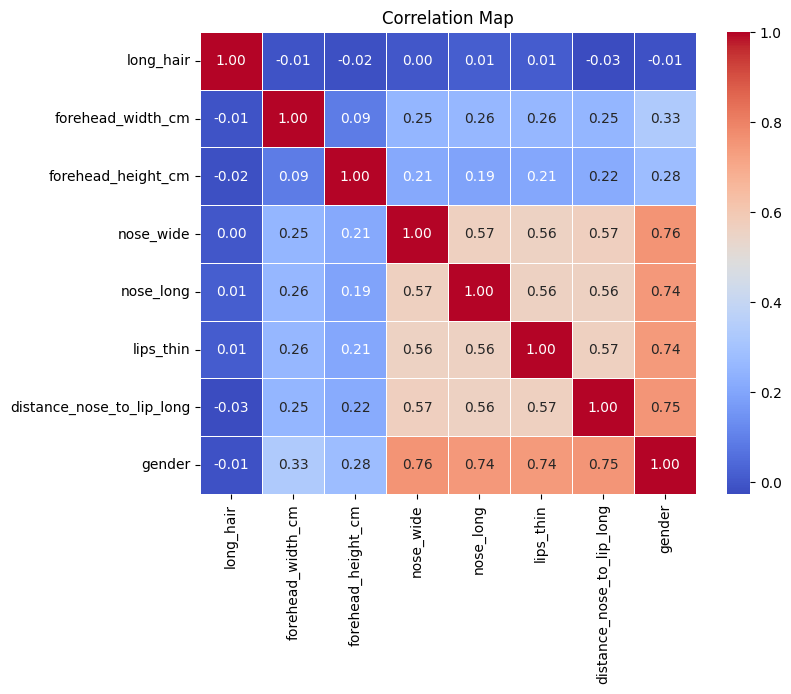

In [5]:
non_numeric_columns = ['gender']

# Convert non numeric columns
label_encoder = LabelEncoder()
dataFrameCopy = dataFrame.copy()
dataFrameCopy[non_numeric_columns] = dataFrameCopy[non_numeric_columns].apply(lambda col: label_encoder.fit_transform(col))

# Calculate the correlation matrix
correlation_matrix = dataFrameCopy.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Map')
plt.show()

#### Feature selection

In [6]:
pearson = PearsonCorrelationSelector()
pearson_selected_columns = pearson.select(dataFrameCopy, 'gender')
print(f"pearson_selected_columns is {pearson_selected_columns}")

pearson_selected_columns is ['nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']


In [7]:
point_biserial = PointBiserialCorrSelector(last_level=1)
point_biserial_selected_column = point_biserial.select(dataFrame, 'gender')
print(f"point_biserial_selected_column is {point_biserial_selected_column}")

point_biserial_selected_column is ['nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']


#### Training model

In [8]:
# Split the dataset into features and target
X = dataFrame[pearson_selected_columns]
y = dataFrame['gender']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict the target values using the trained model
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the predictions on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9540306462358428
